In [1]:
""" From "COMPUTATIONAL PHYSICS" & "COMPUTER PROBLEMS in PHYSICS"
    by RH Landau, MJ Paez, and CC Bordeianu (deceased)
    Copyright R Landau, Oregon State Unv, MJ Paez, Univ Antioquia, 
    C Bordeianu, Univ Bucharest, 2020. 
    Please respect copyright & acknowledge our work."""
    
# Beam.py: solves Navier-Stokes equation for the flow around a beam

from numpy import *                                    # Needed for range
import pylab as p
from mpl_toolkits.mplot3d import Axes3D ;
from matplotlib import image;

Nxmax = 70
Nymax = 20;                                              # Grid parameters
u = zeros((Nxmax + 1,Nymax + 1),float)                   # Stream 
w = zeros((Nxmax + 1,Nymax + 1),float)                   # Vorticity
V0 = 1.0                                                 # Initial v
omega = 0.1                                              # Relaxation param
IL = 10                                                  # Geometry      
H = 8
T = 8          
h = 1.
nu = 1.                                                   # Viscosity
iter = 0                                                  # Number iterations
R = V0*h/nu                                  # Reynold number, normal units
print("Working, wait for the figure, count to 30")

Working, wait for the figure, count to 30


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


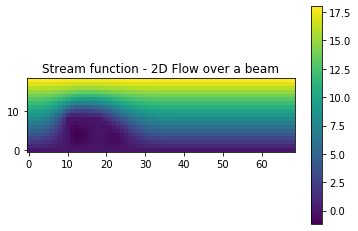

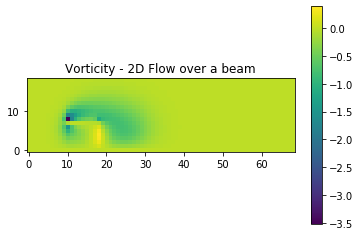

finished


In [2]:

def borders():                        # Initialize stream,vorticity, sets BC
    for i in range(0, Nxmax+1):                # Initialize stream function
       for j in range(0, Nymax+1 ):                        # Init vorticity
            w[i,j] = 0.
            u[i,j] = j*V0
    for i in range(0,Nxmax+1 ):                             # Fluid surface
      u[i,Nymax] = u[i,Nymax-1] + V0*h
      w[i,Nymax-1] = 0.  
    for j in range(0,Nymax+1 ):
        u[1,j] = u[0,j]
        w[0,j] = 0.                                                  # Inlet
    for  i in range(0,Nxmax+1 ):                               # Centerline
       if i <= IL and i>=IL + T:
           u[i,0] = 0.
           w[i,0] = 0. 
    for j in range(1, Nymax ):                                      # Outlet
        w[Nxmax,j] = w[Nxmax-1,j] 
        u[Nxmax,j] = u[Nxmax-1,j]                                 #  Borders

def beam():                                                 # BC for the beam
   for  j in range (0, H+1):                                     # Beam sides
      w[IL,j]=-2*u[IL-1,j]/(h*h)                                 # Front side
      w[IL + T,j]=-2*u[IL + T + 1,j]/(h*h)                        # Back side
   for  i in range(IL,IL + T+1):
       w[i,H-1] = -2*u[i,H]/(h*h);                                     # Top
   for i in range(IL, IL + T+1 ):
     for j in range(0,H+1):
         u[IL,j] = 0.                                               # Front
         u[IL + T,j] = 0.                                            # Back
         u[i,H] = 0;                                                  # Top
         
def relax():                                         # Method to relax stream
    beam()                                         # Reset conditions at beam
    for  i in range(1, Nxmax):                        # Relax stream function
      for  j in range (1, Nymax):
        r1 = omega*((u[i+1,j]+u[i-1,j]+u[i,j+1]+u[i,j-1]+h*h*w[i,j])/4 -u[i,j]) 
        u[i,j] += r1   
    for  i in range(1, Nxmax):              # Relax vorticity
      for j in range(1,Nymax):
          a1 = w[i + 1,j] + w[i-1,j] + w[i,j + 1]+w[i,j-1]
          a2 = (u[i,j + 1]-u[i,j-1])*(w[i + 1,j]-w[i-1,j])
          a3 = (u[i + 1,j]-u[i-1,j])*(w[i,j+1]-w[i,j-1])
          r2 = omega*((a1-(R/4.)*(a2-a3))/4.0 -w[i,j])
          w[i,j]  += r2

m = 0
borders()
while (iter <= 300):
    iter += 1
    if iter%10 == 0:
        print(m)
        m += 1
    relax()
for  i in range (0, Nxmax+1):
   
    for  j in range(0,Nymax+1 ):   
        u[i,j] = u[i,j]/(V0*h)    #stream in V0h units
#u.resize((70,70));
#w.resize((70,70));
x=list(range(0,Nxmax-1))                   #to plot lines in x axis
y=list(range(0,Nymax-1))
#x=range(0,69)                   #to plot lines in x axis
#y=range(0,69)
X,Y=p.meshgrid(x,y)                  #grid for position and time

def functz(u):                       #returns stream flow to plot
    z = u[X,Y]                         #for several iterations
    return z

def functz1(w):                       #returns stream flow to plot
    z1 = w[X,Y]                         #for several iterations
    return z1
    
Z = functz(u)
Z1 = functz1(w)
fig1 = p.figure()
p.title('Stream function - 2D Flow over a beam')
p.imshow(Z, origin='lower');
p.colorbar();
fig2=p.figure()
p.title('Vorticity - 2D Flow over a beam')
p.imshow(Z1, origin='lower');
p.colorbar();
p.show()                             # Shows the figure, close Python shell to
                                    # Finish watching the figure       
print("finished")        